# 회귀분석에서의 공선성(Collinearity) 이해

공선성(collinearity)이란 회귀분석에서 두 개 이상의 설명변수(독립변수) 간에 강한 상관관계가 있는 경우를 말합니다. 이는 회귀모델의 해석과 예측 정확도에 영향을 미칠 수 있습니다.

## 데이터 준비

분석을 위해 적절한 데이터 세트를 로드합니다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data loading code (to be replaced with actual data)
df = pd.read_csv('https://stats.oarc.ucla.edu/wp-content/uploads/2016/02/p121.txt', sep="\t", header='infer')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,443,49,79,76,8,15,205
1,290,27,70,31,6,6,129
2,676,115,92,130,0,9,339
3,536,92,62,92,5,8,247
4,481,67,42,94,16,3,202


In [3]:
df.shape

(40, 7)

## 공선성 식별

변수 간의 상관관계를 계산하고 히트맵으로 시각화합니다.

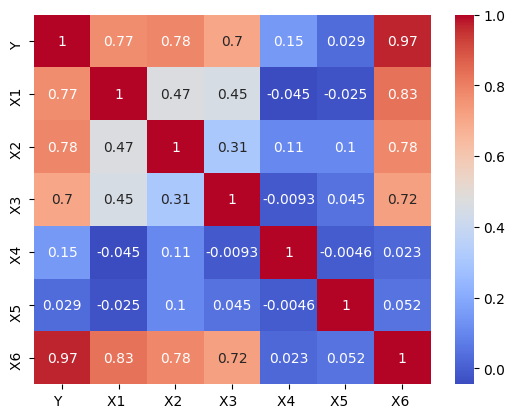

In [4]:
# Correlation matrix calculation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 공선성 해결 방법

공선성의 양을 정량화하기 위해 분산 팽창 인자(Variance Inflation Factor, VIF)를 사용합니다. 그리고 공선성을 완화하기 위한 전략들을 살펴봅니다.

In [5]:
# VIF calculation (example code)
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,Y,320.491021
1,X1,6668.746447
2,X2,6282.738600
3,X3,6950.639549
4,X4,7.902563
5,X5,3.408046
6,X6,56966.220774


## 주성분 분석 (PCA)

주성분 분석(PCA)은 공선성 문제를 해결하기 위한 한 방법으로, 데이터의 차원을 축소시키고 정보 손실을 최소화하는 방법입니다. 이를 통해 주요한 패턴을 식별할 수 있습니다.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the dataframe
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# Convert the normalized array back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# PCA 실행 코드 (예시)
pca = PCA(n_components=df_normalized.iloc[:,1:].shape[1])  # Adjust the number of components
principalComponents = pca.fit_transform(df_normalized.iloc[:,1:])
pc_columns = ["PC" + str(i) for i in range(1, pca.n_components_ + 1)]
principalDf = pd.DataFrame(data=principalComponents, columns=pc_columns)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.067415,-0.356752,1.452504,-0.089759,0.708874,-0.000673
1,2.264132,0.557594,0.178774,-1.469305,0.835001,0.004142
2,-3.532830,2.226799,1.228100,0.631759,0.395890,-0.013532
3,-1.052900,1.336524,0.533071,0.368497,-0.216567,0.000394
4,0.118402,-0.123154,-1.452131,1.379480,-0.076723,0.022699


## 고유벡터와 고유값

PCA에서는 데이터의 분산을 최대화하는 방향을 찾기 위해 고유벡터와 고유값을 계산합니다. 이들은 데이터 내의 주요한 구조를 나타냅니다.

In [18]:
# 고유벡터와 고유값 계산 (예시)
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

print(eigenvectors.shape, "\n")
print(pd.DataFrame(eigenvectors), "\n")
print([round(x,2) for x in eigenvalues])


(6, 6) 

          0         1         2         3         4         5
0 -0.494491 -0.457530 -0.435909 -0.019237 -0.046272 -0.594658
1  0.172026 -0.230201  0.112197 -0.816864 -0.487133  0.016153
2 -0.063335 -0.006222  0.034808 -0.516023  0.853313 -0.017769
3 -0.103969 -0.596158  0.765069  0.203426  0.079153 -0.028427
4 -0.763073  0.498389  0.343797 -0.157159 -0.161717  0.016727
5  0.358865  0.365841  0.304395 -0.001243 -0.000585 -0.802943 

[2.9, 1.06, 1.03, 0.69, 0.47, 0.0]


In [22]:
# Construct linear combination for PC1
print("PC1:", eigenvectors[0])
print("Original Data:\n",df_normalized.iloc[:, 1:].head(), "\n")
linear_combination = np.dot(df_normalized.iloc[:, 1:], eigenvectors[0])
print("results:\n", linear_combination)

PC1: [-0.49449057 -0.45753003 -0.43590869 -0.01923689 -0.04627244 -0.59465769]
Original Data:
          X1        X2        X3        X4        X5        X6
0 -0.718533  0.448802  0.155978 -0.589069  1.288365 -0.056711
1 -1.517913  0.128229 -1.753960 -1.021413 -0.475176 -1.288144
2  1.679605  0.911852  2.447904 -2.318445  0.112671  2.114501
3  0.843890 -0.156725  0.835067 -1.237585 -0.083278  0.623818
4 -0.064495 -0.869109  0.919954  1.140307 -1.063023 -0.105320 

results:
 [ 0.06741464  2.26413246 -3.53282967 -1.05290037  0.11840222  2.41525812
 -0.10222508 -2.19985044 -0.83447645  0.88457056  0.12188648  4.4753011
  0.28817412 -0.70913099  1.89803128 -1.40681965 -1.47922255 -1.85127078
 -1.55307757  0.32429976  2.69133722  0.47606596  0.10390123  1.15593062
  0.43462964 -1.75003003 -0.65347204 -1.45806378 -1.93133117  0.82038309
  1.76678045  1.24423344  0.05765577 -3.61890602  0.32103755  1.58327694
  2.30483131 -1.64426116  0.37061095 -0.41027716]


In [21]:
print("PC6:", [round(x, 2) for x in eigenvectors[-1]])

PC6: [0.36, 0.37, 0.3, -0.0, -0.0, -0.8]


In [10]:
print("PC6:")
print(" + ".join(["".join([str(round(x, 3)), "X", str(ind+1)]) for ind, x in enumerate(eigenvectors[-1])]), "~= 0")

PC6:
0.359X1 + 0.366X2 + 0.304X3 + -0.001X4 + -0.001X5 + -0.803X6 ~= 0


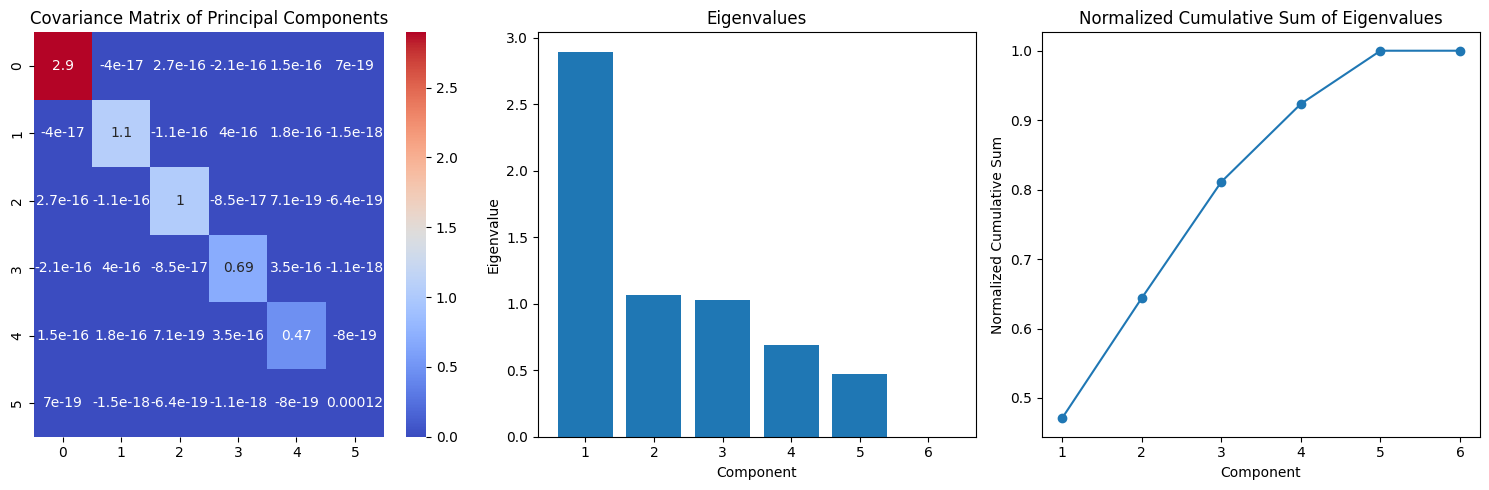

In [11]:
# Calculate the covariance matrix of the principal components
cov_matrix = np.cov(principalComponents.T)

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the heatmap of the covariance matrix on the first subplot
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Covariance Matrix of Principal Components')

# Plot the bar plot of the eigenvalues on the second subplot
axs[1].bar(range(1,len(eigenvalues)+1), eigenvalues)
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_title('Eigenvalues')

# Normalize the cumulative sum to 1
cumulative_sum = np.cumsum(eigenvalues)
normalized_cumulative_sum = cumulative_sum / np.sum(eigenvalues)

# Plot the normalized cumulative sum on the third subplot
axs[2].plot(range(1, len(eigenvalues) + 1), normalized_cumulative_sum, marker='o')
axs[2].set_xlabel('Component')
axs[2].set_ylabel('Normalized Cumulative Sum')
axs[2].set_title('Normalized Cumulative Sum of Eigenvalues')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()



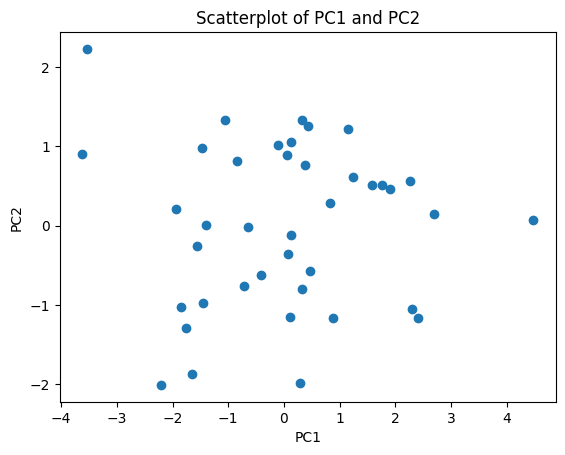

In [12]:
# Create a scatterplot using PC1 and PC2
plt.scatter(principalDf['PC1'], principalDf['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PC1 and PC2')
plt.show()


In [13]:
df_normalized.columns = [x.rstrip() for x in df_normalized.columns]

In [14]:
import statsmodels.api as sm

# Add the target variable to the principal components dataframe
principalDf['target'] = df_normalized['Y']

principalDf_regr = principalDf.loc[:,['target','PC1']]

# Split the data into training and testing sets
train_data = principalDf_regr.sample(frac=0.8, random_state=1)
test_data = principalDf_regr.drop(train_data.index)

# Separate the target variable from the features
train_X = train_data.iloc[:, :-1]
train_y = train_data['target']
test_X = test_data.iloc[:, :-1]
test_y = test_data['target']


# Add a constant column to the features
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

# Fit the regression model
model = sm.OLS(train_y, train_X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.179e+32
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:43:37   Log-Likelihood:                 1099.9
No. Observations:                  32   AIC:                            -2196.
Df Residuals:                      30   BIC:                            -2193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.082e-16   5.23e-17     -3.980      0.0